In [56]:
pip install qiskit[all]


  Obtaining dependency information for z3-solver>=4.7 from https://files.pythonhosted.org/packages/26/94/352fc6e18bd23056b57132bbe9d40facd5f70acebe23a6c49bfd89fa2bc0/z3_solver-4.13.3.0-py3-none-win_amd64.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for qiskit-qasm3-import>=0.1.0 from https://files.pythonhosted.org/packages/cd/1d/12529a4ab9910ab15409ac79fff32a729cf54d65187b386954a52fd84f2b/qiskit_qasm3_import-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/a7/e4/463fd46922e0b0b369305662f85f1c70dcc1cde1584906cf8defed8308a3/pydot-3.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for openqasm3[parser]<0.6,>=0.4 from https://files.pythonhosted.org/packages/51/91/574addbe722736081d1b9c78212f8cac5e9d93c8bc79059c84871034c527/openqasm3-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information

# Basic guide of Qiskit

In Qiskit, the qubits are initialized in the state $| 0\rangle$. For this simple example, we aim to obtain the following 2-qubit state, Bell State:

\begin{equation}
    |\psi \rangle = \dfrac{1}{\sqrt{2}}\Big( | 00 \rangle + | 11 \rangle\Big)
    \end{equation}

To achieve this state, we need to apply a Hadamard gate to the first qubit, followed by a CNOT gate, with the first qubit as the control,C, and the second qubit as the target,T.

**Mathematical Solution**

*The product $H\otimes \mathbb{1}$ (read as "Hadamard on the first qubit and identity on the second qubit") is applied because the Hadamard gate is intended to act only on the first qubit, leaving the second qubit unchanged.*

\begin{equation}
      H \otimes \mathbb{1} = \dfrac{1}{\sqrt{2}}\begin{pmatrix}
                    1 \mathbb{1} & 1\mathbb{1}\\
                    1 \mathbb{1} & -1\mathbb{1}
                    \end{pmatrix} = \dfrac{1}{\sqrt{2}}\begin{pmatrix}
                    1 & 0 & 1 & 0\\
                    0 & 1 & 0 & 1\\
                    1 & 0 & -1 & 0\\
                    0 & 1 & 0 & -1.
                    \end{pmatrix}
 \end{equation}
 
*Then*

 \begin{equation}
 \begin{split}
 H \otimes \mathbb{1} | 00\rangle & = \dfrac{1}{\sqrt{2}}\begin{pmatrix}
                    1 & 0 & 1 & 0\\
                    0 & 1 & 0 & 1\\
                    1 & 0 & -1 & 0\\
                    0 & 1 & 0 & -1.
                    \end{pmatrix} \begin{pmatrix}
                    1\\
                    0\\
                    0\\
                    0
                    \end{pmatrix}  
                    =  \dfrac{1}{\sqrt{2}} \begin{pmatrix}
                    1\\
                    0\\
                    1\\
                    0
                    \end{pmatrix}\\ & = \dfrac{1}{\sqrt{2}}\Big(|00\rangle + |01\rangle\Big)
 \end{split}
\end{equation}
*Finally, let us apply the CNOT gate, with the first qubit as the control and the second qubit as the target. We obtain:*

\begin{equation}
\dfrac{1}{\sqrt{2}} CNOT\Big(|\overbrace{0}^{T}\overbrace{0}^{C}\rangle + |\overbrace{0}^{T}\overbrace{1}^{C}\rangle\Big) = \dfrac{1}{\sqrt{2}}\Big( | 00 \rangle + |11 \rangle\Big)
\end{equation}

*Now, let us execute this state in the simulator*

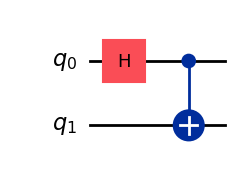

In [2]:
from qiskit import QuantumCircuit


# This initializes a quantum circuit named qc with 2 qubits (quantum bits).
qc = QuantumCircuit(2)

# First, applying a  Hadamard gate in the first qubit.
qc.h(0)

# The CNOT (controlled-NOT) gate flips the state of qubit 1 (the target) only if qubit 0 (the control) is in the state |1⟩.
# This creates an entanglement between qubit 0 and qubit 1.
qc.cx(0,1)

# Finally, drawing the  quantum circuit.
qc.draw(output = 'mpl')


## GHZ state

The GHZ state is an entangled quantum state for 3 qubits and its state is
\begin{equation}
| GHZ \rangle = \frac{1}{\sqrt{2}}\Big(| 000\rangle + | 111\rangle \Big)
\end{equation}

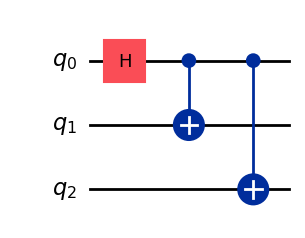

In [3]:
# Initialize a quantum circuit named qcghz with 3 qubits 
qcghz = QuantumCircuit(3)

# first, applying the Hadamard gate in the first qubit
qcghz.h(0)

# Second, using the CNOT gate, with control and target in the first and second qubit.
qcghz.cx(0,1)

# Third, using again the CNOT gate, with control and target in the first and third qubit.
qcghz.cx(0,2)

# Finally, drawing the circuit
qcghz.draw(output = 'mpl')


## Bloch's Sphere

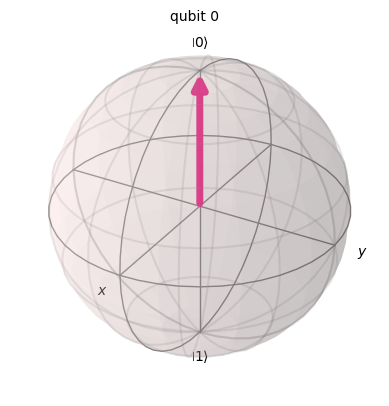

In [43]:
# subpackages need to be separately imported
from qiskit.quantum_info import Statevector  
from qiskit.visualization import plot_bloch_multivector

# Creating a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Statevector is a class used to represent the state of a quantum system as a state vector.
# It provides a way to manipulate and analyze quantum states.
init_state = Statevector(qc) 

# The plot_bloch_multivector function in Qiskit is used to visualize the quantum state
# represented by a Statevector on the Bloch sphere.
plot_bloch_multivector(init_state)


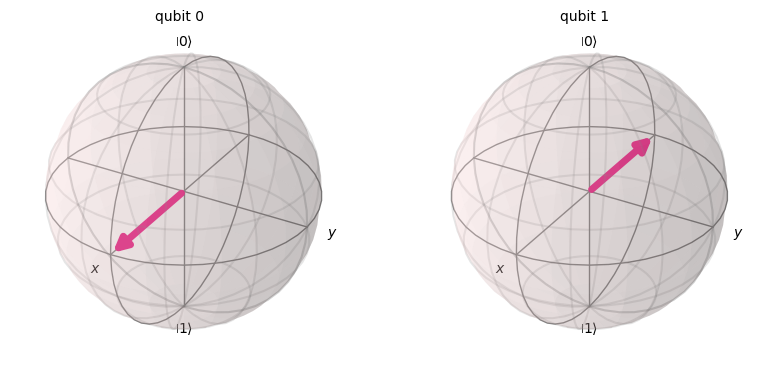

In [44]:
import matplotlib.pyplot as plt

qc1 =  QuantumCircuit(2)

# Putting the qubit 1 in superposition
qc1.h(0)

# Second, putting the qubit 2 in |1> 
# Then, putting the qubit 2 in superposition
qc1.x(1)
qc1.h(1)
 
# Third, representing the state of a quantum system as a state vector.
state = Statevector(qc1) 

# Plot both states on separate Bloch spheres
plot_bloch_multivector(state)






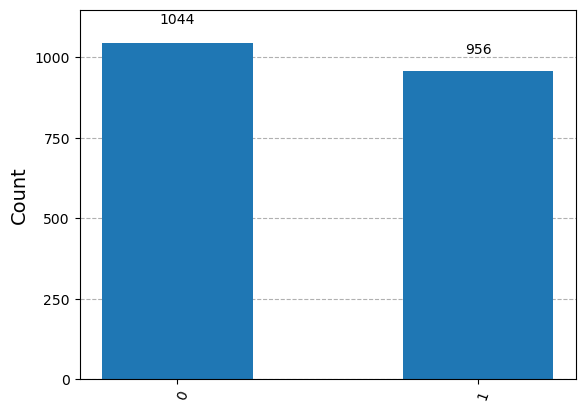

In [61]:
# Import necessary Qiskit libraries
# AerSimulator: This is part of the qiskit_aer library,
# which allows us to simulate quantum circuits on a classical computer.
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Step 1: Create a Quantum Circuit
qc = QuantumCircuit(1, 1)  # 1 qubit and 1 classical bit
qc.h(0)                    # Apply Hadamard gate to qubit 0
qc.measure(0, 0)           # Measure qubit 0 and store the result in classical bit 0

# Step 2: Use AerSimulator that initializes a simulator that can mimic 
# the behavior of a quantum device
simulator = AerSimulator()

# Step 3: Execute the Circuit on the Simulator
# This returns a job object containing the simulation data.
# The result object contains data about the final states of the quantum circuit after running.
job = simulator.run(qc, shots = 2000)
result = job.result()

# Step 4: Get the result and plot the histogram
# This will count how many times the measurement produced 0 and how many times it produced 1.
counts = result.get_counts(qc)
plot_histogram(counts)

## Grove's Algorithm

Grover's algorithm is used to find the index of a specific element within an unordered list. This algorithm consists of four main parts:
   
     [1] The superposition of 3 Qubits.
     [2] Oracle function: It marks the specific element that we are searching.
     [3] Amplification of Amplitude: This process increases the probability of measuring the specific element that we are searching.
     [4] Measure: In this final step, we measure the quantum state of the qubits to obtain the index of the specific element.
     
This algorithm is significant because it accelerates the search for specific items or relevant data, making analyses more efficient. The presented code below is built to search the state $| 111 \rangle$

### First step : Creating the superposition of 3 qubits

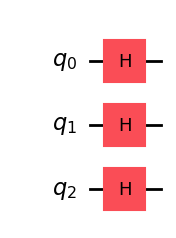

In [51]:
from qiskit import ClassicalRegister
from qiskit import QuantumRegister
state = QuantumCircuit(3)
state.h([0,1,2])
state.draw(output = 'mpl')


### Second step:  Oracle function

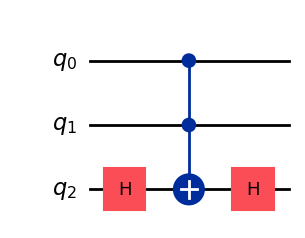

In [65]:
q = QuantumRegister(3, 'q')
b = ClassicalRegister(3)
oracle = QuantumCircuit(q, name = 'oracle')
oracle.h(q[2])
oracle.ccx(q[0],q[1],q[2])
oracle.h(q[2])
oracle.draw(output = 'mpl')

### Step 3 : Aplification of amplitude

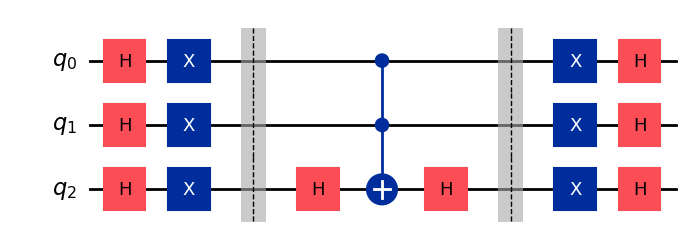

In [53]:
ampl = QuantumCircuit(q, name = 'amplification')
# X-Gate applies to all states
ampl.h([q[0],q[1],q[2]])

# X-Gate applies to all states
ampl.x([q[0],q[1],q[2]])

ampl.barrier()

# CCZ gate
ampl.h(q[2])
ampl.ccx(q[0],q[1],q[2])
ampl.h(q[2])
ampl.barrier()

# X-Gate
ampl.x([q[0],q[1],q[2]])

# Hadamard gate
ampl.h([q[0],q[1],q[2]])
ampl.draw(output = 'mpl')

### Step 4 : Measure

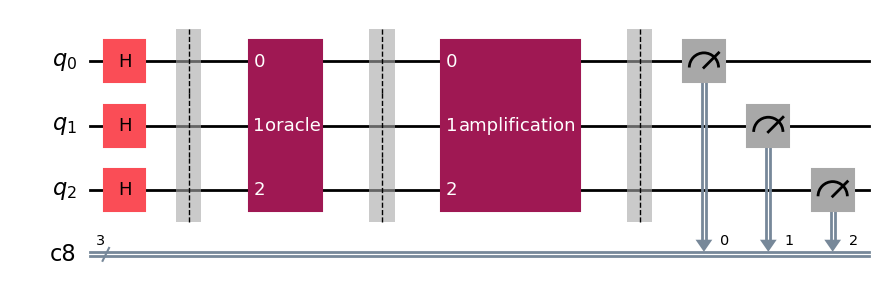

In [67]:

grover = QuantumCircuit(q,b)
grover.h([q[0],q[1],q[2]])
grover.barrier()

# Append the oracle circuit
grover.append(oracle,q)
grover.barrier()

# Append the amplification circuit
grover.append(ampl,q)
grover.barrier()

grover.measure([q[0],q[1],q[2]],b)
grover.draw(output = 'mpl')

In [72]:
#from qiskit_aer import AerSimulator
# Simular o circuito usando AerSimulator
# Simulate the circuit using the Aer simulator
#simulator = AerSimulator()

# Execute the circuit
#job = simulator.run(grover, shots=2000)
#result = job.result()

# Get the measurement results
#counts = result.get_counts()

# Print the measurement results
#print("Measurement results:", counts)

# Plot the histogram of results
#plot_histogram(counts)

## References

    [1] G. F. de Jesus and et al., Quantum Computing: an undergraduate approach using Qiskit, https://arxiv.org/abs/2101.11388}

    [2] https://medium.com/queen-of-qiskit/getting-started-with-qiskit-explained-by-a-software-developer-not-a-quantum-physicist-b8ba820685e5
    [3] https://medium.com/@harini.hapuarachchi/a-beginners-guide-to-qiskit-1-0-c8e3e854d732